<a href="https://colab.research.google.com/github/Armin-Abdollahi/Bone-Age-Estimation/blob/main/Bone_Age_Attention_Mechanisms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Soft Attention mechanism

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load the labels
labels_path = '/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images/Label.csv'
labels = pd.read_csv(labels_path)

In [ ]:
labels['Case ID'] = labels['Case ID'].apply(lambda x: str(x)+'.jpg')

labels.head()

,Case ID,Bone Age,Male,Location
0,1.jpg,0,False,Asian
1,2.jpg,0,False,Asian
2,3.jpg,0,False,Asian
3,4.jpg,0,False,Asian
4,5.jpg,0,False,Asian


In [ ]:
# Ensure the 'Case ID' column is of type string
labels['Case ID'] = labels['Case ID'].astype(str)

In [ ]:
# Create the image data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# Create the train and validation generators
train_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Bone Age',
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=32,
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Bone Age',
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=32,
    subset='validation'
)

Found 5915 validated image filenames.
Found 1478 validated image filenames.


In [ ]:
# Build the CNN model with soft attention
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    GlobalAveragePooling2D(),  # Soft attention: global average pooling
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')  # Linear activation for regression
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile and train the model (same as before)
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae', 'accuracy'])

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


184/184 ━━━━━━━━━━━━━━━━━━━━ 3110s 16s/step - accuracy: 0.0547 - loss: 41.5119 - mae: 5.1974 - val_accuracy: 0.0679 - val_loss: 11.2335 - val_mae: 2.7308
Epoch 2/10
  1/184 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.0000e+00 - loss: 13.7759 - mae: 2.8482

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.0000e+00 - loss: 13.7759 - mae: 2.8482 - val_accuracy: 0.0000e+00 - val_loss: 1.8475 - val_mae: 1.2564
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.0560 - loss: 10.1545 - mae: 2.5542 - val_accuracy: 0.0836 - val_loss: 8.2062 - val_mae: 2.4308
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.0938 - loss: 7.6370 - mae: 2.3452 - val_accuracy: 0.0000e+00 - val_loss: 8.4878 - val_mae: 2.1715
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 291s 2s/step - accuracy: 0.0655 - loss: 8.5473 - mae: 2.2560 - val_accuracy: 0.0842 - val_loss: 7.7484 - val_mae: 2.3559
Epoch 6/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 22s 122ms/step - accuracy: 0.0312 - loss: 6.1923 - mae: 2.1210 - val_accuracy: 0.0000e+00 - val_loss: 2.6062 - val_mae: 1.4932
Epoch 7/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.0621 - loss: 7.7109 - mae: 2.1148 - val_accuracy: 0.0836 - val_loss: 6.0540 - val_mae: 1.9142
Epoch 8/10
184/184 ━━━━━

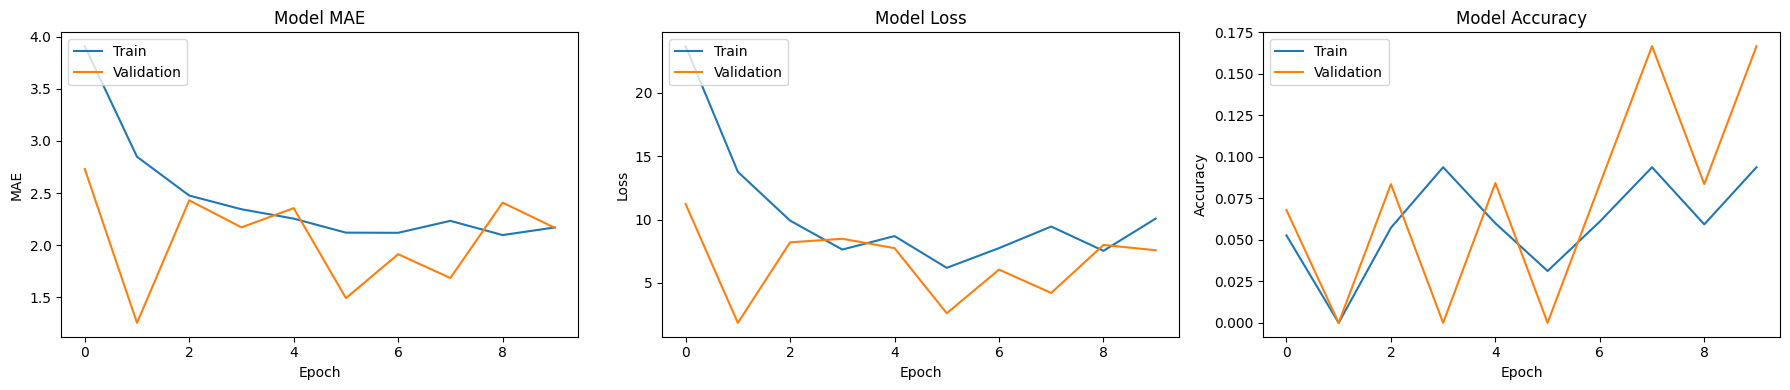

In [ ]:
# Plot training & validation MAE values
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=18
)

Epoch 1/18


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


184/184 ━━━━━━━━━━━━━━━━━━━━ 2922s 15s/step - accuracy: 0.0554 - loss: 45.7819 - mae: 5.4675 - val_accuracy: 0.0679 - val_loss: 12.2257 - val_mae: 3.0166
Epoch 2/18
  1/184 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.0625 - loss: 14.5146 - mae: 3.3853

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.0625 - loss: 14.5146 - mae: 3.3853 - val_accuracy: 0.0000e+00 - val_loss: 11.4841 - val_mae: 3.1752
Epoch 3/18
184/184 ━━━━━━━━━━━━━━━━━━━━ 334s 2s/step - accuracy: 0.0544 - loss: 12.3169 - mae: 2.9035 - val_accuracy: 0.0673 - val_loss: 11.3680 - val_mae: 2.9422
Epoch 4/18
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0312 - loss: 12.7355 - mae: 3.0110 - val_accuracy: 0.1667 - val_loss: 19.5343 - val_mae: 4.1602
Epoch 5/18
184/184 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.0570 - loss: 10.4057 - mae: 2.5846 - val_accuracy: 0.0836 - val_loss: 7.2235 - val_mae: 2.2623
Epoch 6/18
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.0000e+00 - loss: 8.9093 - mae: 2.5403 - val_accuracy: 0.1667 - val_loss: 4.0381 - val_mae: 1.7427
Epoch 7/18
184/184 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/step - accuracy: 0.0580 - loss: 8.0766 - mae: 2.1874 - val_accuracy: 0.0842 - val_loss: 7.1222 - val_mae: 2.2670
Epoch 8/18
184/184 ━━━━━━━━━━━

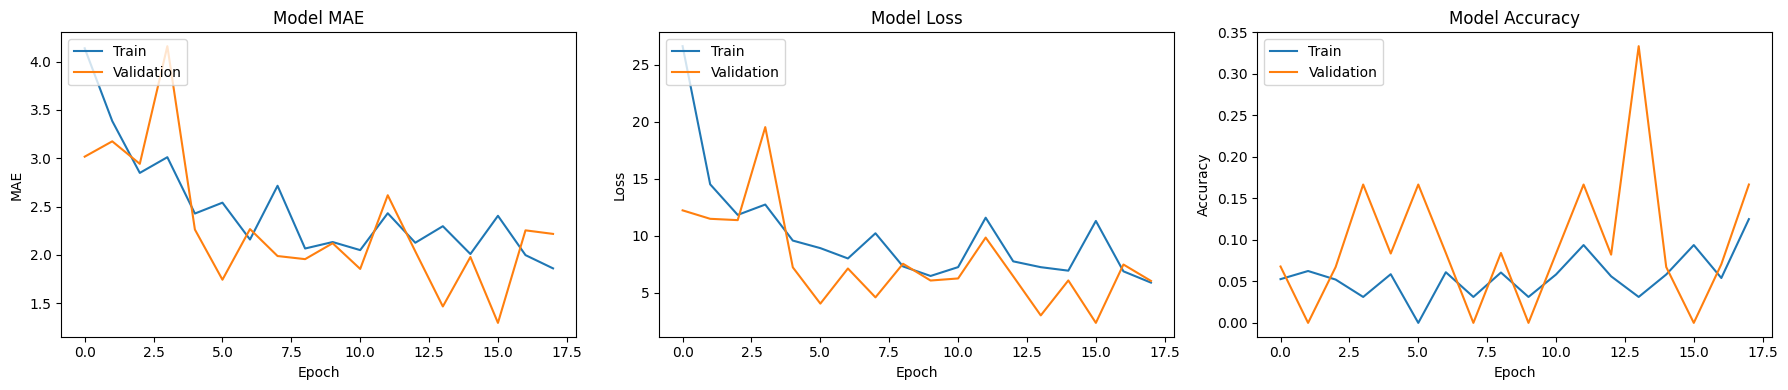

In [ ]:
# Plot training & validation MAE values
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### Hard attention mechanisms

### Self Attention mechanism
Integrates a Multi Head Attention layer and Layer Normalization to implement self-attention

self-attention mechanism using the MultiHeadAttention layer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, MultiHeadAttention, LayerNormalization, Add, Input, Reshape
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load the labels
labels_path = '/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images/Label.csv'
labels = pd.read_csv(labels_path)

In [ ]:
labels['Case ID'] = labels['Case ID'].apply(lambda x: str(x)+'.jpg')
labels.head()

,Case ID,Bone Age,Male,Location
0,1.jpg,0,False,Asian
1,2.jpg,0,False,Asian
2,3.jpg,0,False,Asian
3,4.jpg,0,False,Asian
4,5.jpg,0,False,Asian


In [ ]:
# Ensure the 'Case ID' column is of type string
labels['Case ID'] = labels['Case ID'].astype(str)

In [ ]:
# Create the image data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
# Create the train and validation generators
train_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Bone Age',
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=32,
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Bone Age',
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=32,
    subset='validation'
)

Found 5915 validated image filenames.
Found 1478 validated image filenames.


In [ ]:
# Build the CNN model with self-attention
inputs = Input(shape=(256, 256, 1))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)

In [ ]:
# Flatten the feature maps
x = Flatten()(x)

I added a Reshape layer before the MultiHeadAttention layer to ensure the input shape is compatible.

In [ ]:
# Reshape for MultiHeadAttention
x = Reshape((1, -1))(x)

In [ ]:
# Add self-attention mechanism
attention_output = MultiHeadAttention(num_heads=4, key_dim=128)(x, x)
attention_output = Add()([x, attention_output])
attention_output = LayerNormalization()(attention_output)

In [ ]:
# Flatten the attention output
attention_output = Flatten()(attention_output)

In [ ]:
# Continue with the rest of the model
x = Dense(512, activation='relu')(attention_output)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='linear')(x)  # Linear activation for regression

model = tf.keras.Model(inputs, outputs)

In [ ]:
# Compile and train the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae', 'accuracy'])

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis 3 of a tensor of shape (None, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


184/184 ━━━━━━━━━━━━━━━━━━━━ 5927s 31s/step - accuracy: 0.0526 - loss: 38014.5938 - mae: 48.0147 - val_accuracy: 0.0679 - val_loss: 17.9100 - val_mae: 3.0908
Epoch 2/10
  1/184 ━━━━━━━━━━━━━━━━━━━━ 25s 138ms/step - accuracy: 0.0938 - loss: 53.7391 - mae: 5.8228

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.0938 - loss: 53.7391 - mae: 5.8228 - val_accuracy: 0.0000e+00 - val_loss: 8.9061 - val_mae: 2.1131
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 350s 2s/step - accuracy: 0.0488 - loss: 44.2524 - mae: 5.0415 - val_accuracy: 0.0761 - val_loss: 19.8273 - val_mae: 3.4061
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - accuracy: 0.0000e+00 - loss: 37.2177 - mae: 4.6178 - val_accuracy: 0.0000e+00 - val_loss: 25.2331 - val_mae: 4.0488
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 325s 1s/step - accuracy: 0.0531 - loss: 43.6387 - mae: 4.9617 - val_accuracy: 0.0740 - val_loss: 14.6368 - val_mae: 2.7656
Epoch 6/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0625 - loss: 46.6239 - mae: 4.7164 - val_accuracy: 0.0000e+00 - val_loss: 16.4587 - val_mae: 3.4074
Epoch 7/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.0520 - loss: 44.2973 - mae: 5.0248 - val_accuracy: 0.0727 - val_loss: 16.1982 - val_mae: 3.1280
Epoch 8/10
184/184

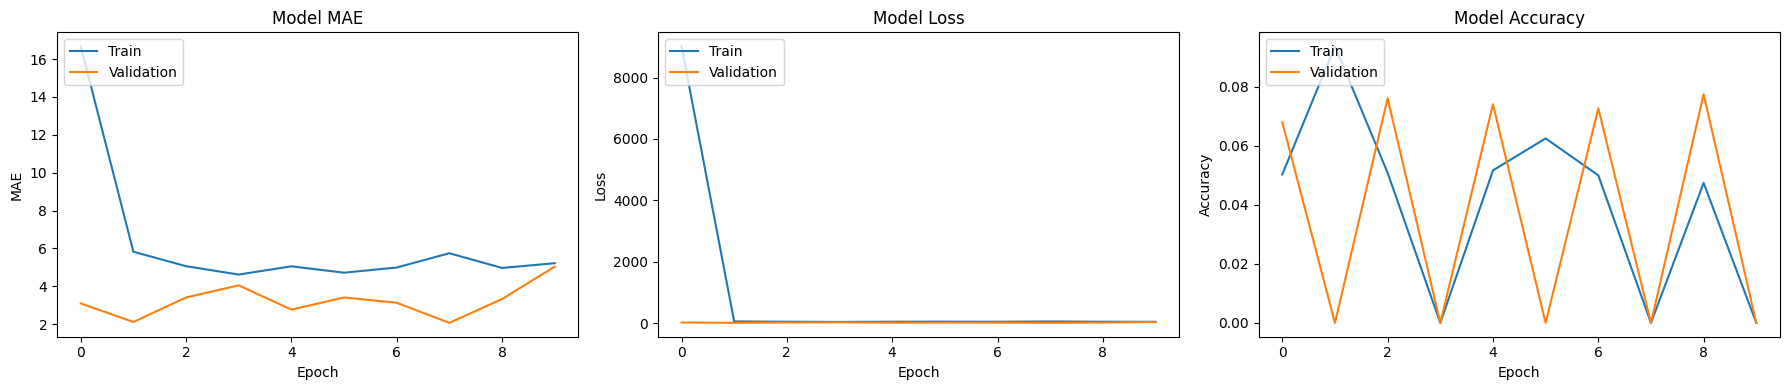

In [ ]:
# Plot training & validation MAE values
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=18
)

In [ ]:
# Plot training & validation MAE values
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### Multi-Head Attention

### Cross-Attention

Cross-attention is typically used in transformer models, but I’ll show that can be integrated into CNN architecture using TensorFlow and Keras.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, Input, Layer
from tensorflow.keras.optimizers import Adam

In [3]:
# Load the labels
labels_path = '/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images/Label.csv'
labels = pd.read_csv(labels_path)

In [4]:
labels['Case ID'] = labels['Case ID'].apply(lambda x: str(x)+'.jpg')
labels.head()

,Case ID,Bone Age,Male,Location
0,1.jpg,0,False,Asian
1,2.jpg,0,False,Asian
2,3.jpg,0,False,Asian
3,4.jpg,0,False,Asian
4,5.jpg,0,False,Asian


In [5]:
# Ensure the 'Case ID' column is of type string
labels['Case ID'] = labels['Case ID'].astype(str)

In [6]:
# Create the image data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [7]:
# Create the train and validation generators
train_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Bone Age',
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=32,
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=labels,
    directory='/content/drive/MyDrive/Digital_Hand_Atlas_Dataset/Total_Images/Bordered_XRay_Images',
    x_col='Case ID',
    y_col='Bone Age',
    target_size=(256, 256),
    color_mode='grayscale',
    class_mode='raw',
    batch_size=32,
    subset='validation'
)

Found 5915 validated image filenames.
Found 1478 validated image filenames.


In [8]:
# Define a custom cross-attention layer
class CrossAttention(Layer):
    def __init__(self, **kwargs):
        super(CrossAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.Wq = self.add_weight(shape=(input_shape[-1], input_shape[-1]), initializer='random_normal', trainable=True)
        self.Wk = self.add_weight(shape=(input_shape[-1], input_shape[-1]), initializer='random_normal', trainable=True)
        self.Wv = self.add_weight(shape=(input_shape[-1], input_shape[-1]), initializer='random_normal', trainable=True)
        super(CrossAttention, self).build(input_shape)

    def call(self, inputs):
        q = tf.matmul(inputs, self.Wq)
        k = tf.matmul(inputs, self.Wk)
        v = tf.matmul(inputs, self.Wv)
        attention_scores = tf.matmul(q, k, transpose_b=True)
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)
        attention_output = tf.matmul(attention_scores, v)
        return attention_output

In [9]:
# Build the CNN model with cross-attention
input_layer = Input(shape=(256, 256, 1))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(2, 2)(x)
x = GlobalAveragePooling2D()(x)

In [10]:
# Apply cross-attention
attention_output = CrossAttention()(x)

In [11]:
# Continue with the rest of the model
x = Dense(512, activation='relu')(attention_output)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='linear')(x)

In [12]:
model = Model(inputs=input_layer, outputs=output_layer)

In [13]:
# Compile and train the model
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae', 'accuracy'])

In [14]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


184/184 ━━━━━━━━━━━━━━━━━━━━ 2498s 13s/step - accuracy: 0.0497 - loss: 44.7040 - mae: 5.5232 - val_accuracy: 0.0673 - val_loss: 27.4979 - val_mae: 4.4361
Epoch 2/10
  1/184 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.0312 - loss: 28.0610 - mae: 4.2167

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


184/184 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.0312 - loss: 28.0610 - mae: 4.2167 - val_accuracy: 0.1667 - val_loss: 34.3281 - val_mae: 5.1415
Epoch 3/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - accuracy: 0.0541 - loss: 31.0402 - mae: 4.8033 - val_accuracy: 0.0679 - val_loss: 47.0058 - val_mae: 5.8879
Epoch 4/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0312 - loss: 40.5227 - mae: 5.3925 - val_accuracy: 0.0000e+00 - val_loss: 37.1337 - val_mae: 5.1244
Epoch 5/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.0494 - loss: 22.4312 - mae: 3.8756 - val_accuracy: 0.0679 - val_loss: 19.5529 - val_mae: 3.9314
Epoch 6/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.0000e+00 - loss: 17.0468 - mae: 3.5854 - val_accuracy: 0.0000e+00 - val_loss: 15.5748 - val_mae: 3.7026
Epoch 7/10
184/184 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.0483 - loss: 10.4409 - mae: 2.5448 - val_accuracy: 0.0679 - val_loss: 10.6743 - val_mae: 2.8093
Epoch 8/10
184/184 ━

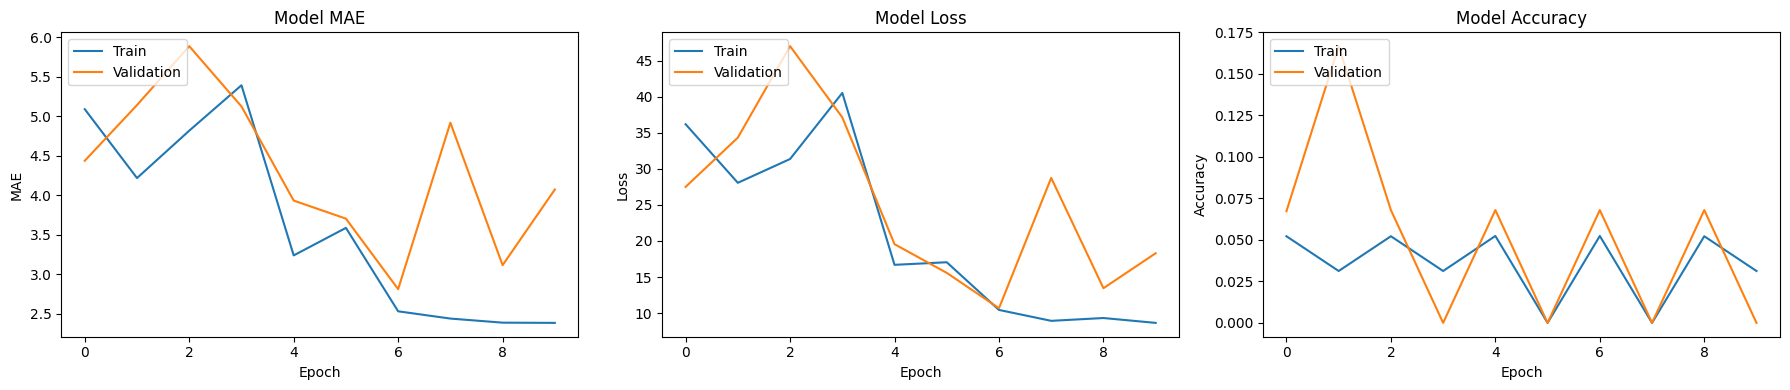

In [15]:
# Plot training & validation MAE values
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=18
)

In [ ]:
# Plot training & validation MAE values
plt.figure(figsize=(18, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 3, 3)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### Causal Attention